# VdKI Projekt Präsentation

In [1]:
def get_precision_recall_f1(predictions, y_true, add_string=""):
    precisions = precision_score(y_true, predictions, average=None)
    recalls = recall_score(y_true, predictions, average=None)
    f1s = f1_score(y_true, predictions, average=None)

    precisions_avg = precision_score(y_true, predictions, average="macro")
    recalls_avg = recall_score(y_true, predictions, average="macro")
    f1s_avg = f1_score(y_true, predictions, average="macro")

    print(f"Average Precision: {precisions_avg}")
    print(f"Average Recall: {recalls_avg}")
    print(f"Average F1-Score: {f1s_avg}")

    fig, ax = plt.subplots(1, 3, figsize=(15,5))
    plt.setp(ax, xticks=np.unique(y_true), xlabel="Anzahl der Tafeln")

    #create subplots
    ax[0].bar(np.unique(y_true), precisions, color='red')
    ax[0].set_title(f"Precision {add_string}")
    ax[1].bar(np.unique(y_true), recalls, color='blue')
    ax[1].set_title(f"Recall {add_string}")
    ax[2].bar(np.unique(y_true), f1s, color='green')
    ax[2].set_title(f"F1-Score {add_string}")
    plt.show()

In [2]:
import sys
import platform

sys_path = '/Users/jonathanhaller/Documents/Studium/Master/Verfahren_der_KI/KI_Projekt/repo/KI_Projekt/Neural_net'
if platform.system() == "Windows":
    sys_path = sys_path.replace("/", "\\")
sys.path.insert(0, sys_path)

from Model import Model
from main import load_ritter_sport_xy, get_mean_error
from sklearn.metrics import precision_score, recall_score, f1_score, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import tensorflow as tf
import tensorflow.keras
import matplotlib.pyplot as plt
import pickle
import pandas as pd
from glob import glob
import os
import cv2

/Users/jonathanhaller/miniforge3/envs/tf_mac_env/lib/python3.9/site-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (None)/charset_normalizer (3.1.0) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [3]:
TEST_FEATURES_PATH = "./Test_Bilder/features_new_colours.csv"

## Verwendete Daten
Bilder mit unterschiedlicher Anzahl an Mini-Rittersporttafeln. Zwischen 0 und 14 Tafeln auf einem Bild

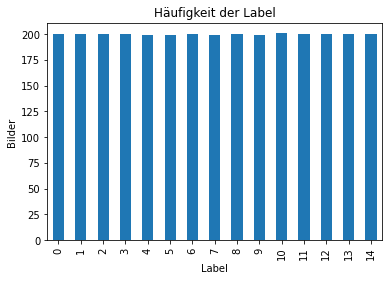

In [4]:
label_path = "./Labeling_App/Labels.csv"
if platform.system() == "Windows":
    label_path = label_path.replace("/", "\\")

df = pd.read_csv(label_path)
ax = df["label"].value_counts().sort_index().plot.bar(xlabel="Label", ylabel="Bilder",title="Häufigkeit der Label")

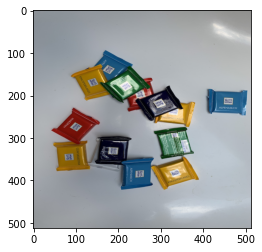

In [5]:
IMAGE_NO = 300

images_path = "./data/"
if platform.system() == "Windows":
    images_path = images_path.replace("/", "\\")

file_list = sorted(os.listdir(images_path))
image_list = [images_path+file for file in file_list if ".png" in file]
image = cv2.imread(image_list[IMAGE_NO])

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [6]:
df.sort_values(by="file", axis=0, inplace=True)
df

,file,label
135,IMG_3608.png,9
148,IMG_3609.png,9
365,IMG_3610.png,9
380,IMG_3611.png,9
346,IMG_3612.png,9
...,...,...
2992,IMG_7344.png,0
2993,IMG_7345.png,0
2994,IMG_7346.png,0
2995,IMG_7347.png,0


## Preprocessing

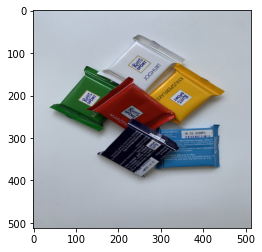

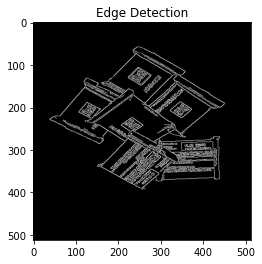

Anzahl der erkannten Linien: 211


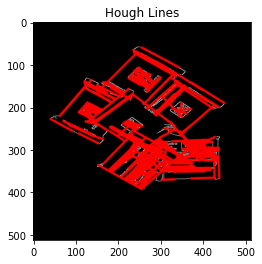

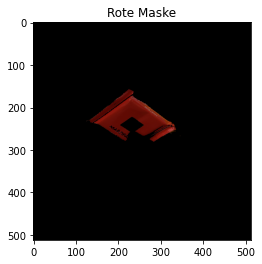

Anzahl der erkannten Konturen: 5
Fläche der erkannten Konturen: 21473


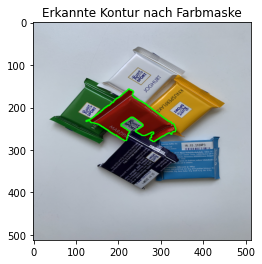

[211, 5, 21473]


In [7]:
%run image_proc_pres.ipynb

## Neuronales Netz mit Tensorflow/Keras
### Laden der Daten für Tensorflow Netz

In [8]:
data_path = "./Image_proc/data_with_features_with_colour.csv"
if platform.system() == "Windows":
    data_path = data_path.replace("/", "\\")

X_train, X_test, y_train, y_test = load_ritter_sport_xy(data_path)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=0)
train_mean = np.mean(X_train)
train_std = np.std(X_train)
X_train = (X_train - train_mean) / train_std
X_test = (X_test - train_mean) / train_std
X_val = (X_val - train_mean) / train_std

### Laden des Modells und Vorhersagen erstellen

In [9]:
model_path = "./models/TF_NN.h5"
if platform.system() == "Windows":
    model_path = model_path.replace("/", "\\")

nn_model = tf.keras.models.load_model(model_path)

Metal device set to: Apple M1


In [10]:
predictions_nn = nn_model.predict(X_test)

19/19 [==============================] - 0s 3ms/step


2023-07-04 13:48:50.745933: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


/Users/jonathanhaller/miniforge3/envs/tf_mac_env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jonathanhaller/miniforge3/envs/tf_mac_env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Average Precision: 0.3319122222403673
Average Recall: 0.3534439625704673
Average F1-Score: 0.2794556376983116


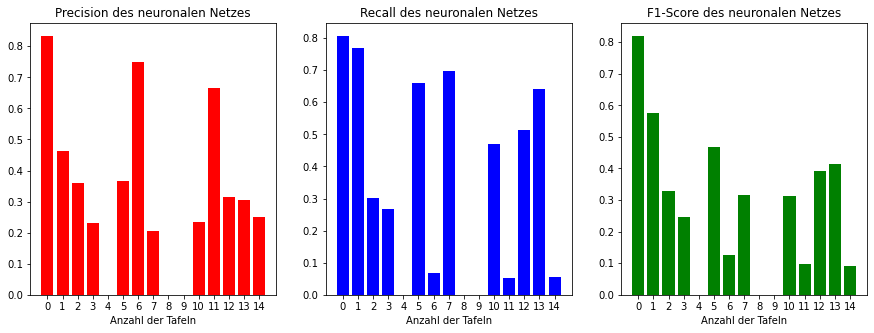

In [11]:
predictions_nn_classes = np.argmax(predictions_nn, axis=1)
y_true = np.argmax(y_test, axis=1)

get_precision_recall_f1(predictions_nn_classes, y_true, add_string="des neuronalen Netzes")

Mean-Error: 2.0767326732673266


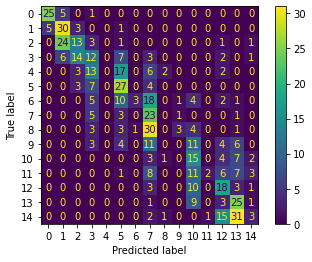

In [12]:
mean_diff = get_mean_error(predictions_nn, y_test)
print(f"Mean-Error: {mean_diff}")
ConfusionMatrixDisplay.from_predictions(y_true, predictions_nn_classes)
plt.show()

## Selbst implementiertes neuronales Netz
### Laden der Daten für selbst implementiertes neuronales Netz

In [13]:
data_path = "./Image_proc/data_with_features_without_white.csv"
if platform.system() == "Windows":
    data_path = data_path.replace("/", "\\")

X_train, X_test, y_train, y_test = load_ritter_sport_xy(data_path, feature_names=["Lines", "Contours Colour", "Contours Size Colour"], test_size=0.2)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=0)
train_mean = np.mean(X_train)
train_std = np.std(X_train)
X_train = (X_train - train_mean) / train_std
X_test = (X_test - train_mean) / train_std
X_val = (X_val - train_mean) / train_std

### Modell laden

In [14]:
model_path = "./models/my_neural_net_2.pkl"
if platform.system() == "Windows":
    model_path = model_path.replace("/", "\\")
    
with open(model_path, 'rb') as inp:
    model = pickle.load(inp)
for count, layer in enumerate(model.layers):
    print(f"Layer {count+1}: {layer.units}")

Layer 1: 3
Layer 2: 128
Layer 3: 64
Layer 4: 32
Layer 5: 15


### Beispielcode für Erstellung und Training des eigenen neuronalen Netzes
```
model = Model()
model.add_layer(X_train.shape[1])
model.add_layer(128)
model.add_layer(64)
model.add_layer(32)
model.add_layer(y_train.shape[1])

model.train(X_train, y_train, epochs=1000, eta=0.01, mini_batch_size=16, val_x=X_val, val_y=y_val)

model.predict(X_test, y_test)
```

test_features_net

Average Precision: 0.4510764971515149
Average Recall: 0.45344547475771513
Average F1-Score: 0.43805947930584094


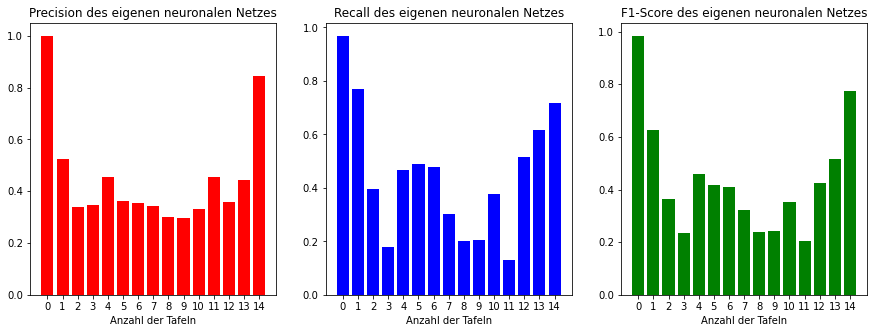

In [15]:
net_predictions = np.argmax(model.predictions, axis=1)
y_true = np.argmax(y_test, axis=1)

get_precision_recall_f1(net_predictions, y_true, add_string="des eigenen neuronalen Netzes")

Mean-Error: 1.8


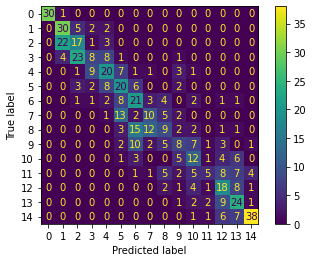

In [16]:
mean_diff = get_mean_error(model.predictions, y_test)
print(f"Mean-Error: {mean_diff}")
ConfusionMatrixDisplay.from_predictions(y_true, net_predictions)
plt.show()

In [17]:
model.predict(X_test, y_test)

Accuracy = 0.46



### Laden der Testdaten

In [18]:
data_path = TEST_FEATURES_PATH
if platform.system() == "Windows":
    data_path = data_path.replace("/", "\\")
    
df = pd.read_csv(data_path)

df_labels = df["label"]
df_labels = pd.get_dummies(df_labels, columns=["label"])
df_labels.insert(loc=0, column='label_0', value=[0 for i in range(df_labels.shape[0])])
df_labels.insert(loc=8, column='label_8', value=[0 for i in range(df_labels.shape[0])])
df_labels.insert(loc=10, column='label_10', value=[0 for i in range(df_labels.shape[0])])
df_labels.insert(loc=11, column='label_11', value=[0 for i in range(df_labels.shape[0])])
df_labels.insert(loc=13, column='label_13', value=[0 for i in range(df_labels.shape[0])])
df_labels.insert(loc=14, column='label_14', value=[0 for i in range(df_labels.shape[0])])

df_files = df["file"]

labels = df_labels.to_numpy()
df.drop(columns=["label", "file"], inplace=True)
test_features_net = df[["Lines", "Contours Colour", "Contours Size Colour"]].to_numpy()

In [19]:
model.predict(test_features_net, labels)

Accuracy = 0.15



## Selbst implementierter Decision Tree

In [20]:
sys_path = '/Users/jonathanhaller/Documents/Studium/Master/Verfahren_der_KI/KI_Projekt/repo/KI_Projekt/Decision_Tree'
if platform.system() == "Windows":
    sys_path = sys_path.replace("/", "\\")

sys.path.insert(0, sys_path)

from My_Decision_Tree import MyDecisionTreeClassifier

In [21]:
data_path = "./Image_proc/data_with_features_without_white.csv"
if platform.system() == "Windows":
    data_path = data_path.replace("/", "\\")

X_train, X_test, y_train, y_test = load_ritter_sport_xy(data_path, feature_names=["Lines", "Contours Colour", "Contours Size Colour"], test_size=0.25)
y_true = np.argmax(y_test, axis=1)

In [22]:
my_tree = MyDecisionTreeClassifier()
my_tree.fit(X_train, np.argmax(y_train, axis=1), max_depth=5)
my_tree.predict(X_test, np.argmax(y_test, axis=1))

Accuracy: 0.6813333333333333


### Metriken des eigenen Decision Trees

Average Precision: 0.6913159681091021
Average Recall: 0.6844014139495973
Average F1-Score: 0.6847337508421256


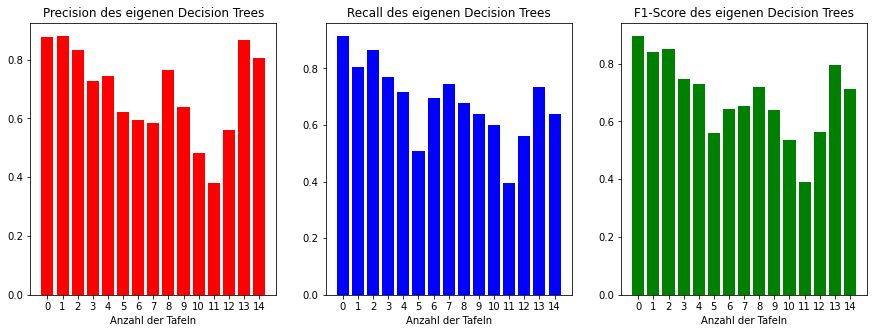

In [23]:
get_precision_recall_f1(my_tree.predictions, y_true, add_string="des eigenen Decision Trees")

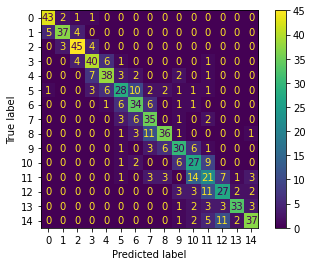

In [24]:
ConfusionMatrixDisplay.from_predictions(y_true, my_tree.predictions)

### Laden der Testdaten

In [25]:
data_path = TEST_FEATURES_PATH
if platform.system() == "Windows":
    data_path = data_path.replace("/", "\\")
    
df = pd.read_csv(data_path)

df_labels = df["label"]
df_labels = pd.get_dummies(df_labels, columns=["label"])
df_labels.insert(loc=0, column='label_0', value=[0 for i in range(df_labels.shape[0])])
df_labels.insert(loc=8, column='label_8', value=[0 for i in range(df_labels.shape[0])])
df_labels.insert(loc=10, column='label_10', value=[0 for i in range(df_labels.shape[0])])
df_labels.insert(loc=11, column='label_11', value=[0 for i in range(df_labels.shape[0])])
df_labels.insert(loc=13, column='label_13', value=[0 for i in range(df_labels.shape[0])])
df_labels.insert(loc=14, column='label_14', value=[0 for i in range(df_labels.shape[0])])

df_files = df["file"]

labels = df_labels.to_numpy()
df.drop(columns=["label", "file"], inplace=True)
test_features_tree = df[["Lines", "Contours Colour", "Contours Size Colour"]].to_numpy()

y_true = np.argmax(labels, axis=1)

In [26]:
my_tree.predict(test_features_tree, y_true)

Accuracy: 0.5


### Metriken des Decision Trees von sklearn

0.7122222222222222
Average Precision: 0.7281200133888068
Average Recall: 0.714133065616687
Average F1-Score: 0.716266711578906


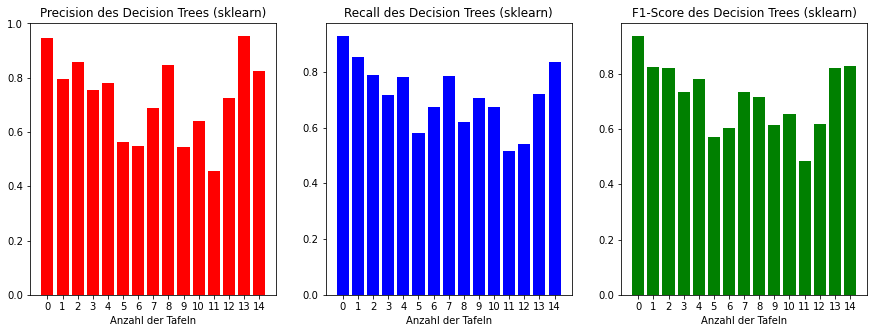

In [27]:
feature_path = './Image_Proc/data_with_features_without_white.csv'
if platform.system() == "Windows":
    feature_path = feature_path.replace("/", "\\")
df = pd.read_csv(feature_path)

X = df[["Contours Colour", "Contours Size Colour", "Lines"]] # definiert die ersten 3 Spalten als Features
y = df["label"] # definiert die letzte Spalte als Kategorie (entspricht dem Ergebnis)
# trennt die Test- und Trainingsdaten / Übergeben werden die Feautues und die Kategorien / die Anzahl der Testdaten (30% zum Testen
# 70% zum Trainieren, random_state wenn auf None werden die Daten immer unterschiedlich zugeteilt, sonst immer die Gleichen)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = DecisionTreeClassifier(random_state=0, max_depth=9) # baut den Entscheidungsbaum mit maximaler Tiefe von 2
# Trainiert den Entscheidungsbaum mit den Trainingsdaten (bestehend aus Input und dem richtigen Ergebnis)
model.fit(X_train, y_train)

print(model.score(X_test, y_test)) # Gibt das Ergebnis des Trainings zurück / wie viele Inputs wurden auf das richtige Ergebnis gemappt
tree_predictions = model.predict(X_test)

get_precision_recall_f1(tree_predictions, y_test, add_string="des Decision Trees (sklearn)")

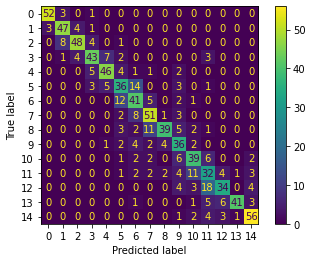

In [28]:
ConfusionMatrixDisplay.from_predictions(y_test, tree_predictions)

### Laden der Testdaten

In [29]:
data_path = TEST_FEATURES_PATH
if platform.system() == "Windows":
    data_path = data_path.replace("/", "\\")

df = pd.read_csv(data_path)

df_labels_classes = df["label"]
df_labels = pd.get_dummies(df_labels_classes, columns=["label"])
df_labels.insert(loc=0, column='label_0', value=[0 for i in range(df_labels.shape[0])])
df_labels.insert(loc=8, column='label_8', value=[0 for i in range(df_labels.shape[0])])
df_labels.insert(loc=10, column='label_10', value=[0 for i in range(df_labels.shape[0])])
df_labels.insert(loc=11, column='label_11', value=[0 for i in range(df_labels.shape[0])])
df_labels.insert(loc=13, column='label_13', value=[0 for i in range(df_labels.shape[0])])
df_labels.insert(loc=14, column='label_14', value=[0 for i in range(df_labels.shape[0])])

df_files = df["file"]

labels = df_labels.to_numpy()
df.drop(columns=["label", "file"], inplace=True)
df_features = df[["Contours Colour", "Contours Size Colour", "Lines"]]
test_features_tree = df[["Contours Colour", "Contours Size Colour", "Lines"]].to_numpy()

y_true = np.argmax(labels, axis=1)

In [30]:
print(model.score(df_features, df_labels_classes))

0.1


## CNN mit Keras

### Laden der Daten

In [31]:
cnn_image_path = "./data/256_res/*.png"
if platform.system() == "Windows":
    cnn_image_path = cnn_image_path.replace("/", "\\")
images_list = glob(cnn_image_path)
image_names = [os.path.basename(file) for file in glob(cnn_image_path)]
features = np.ndarray((len(images_list), 196, 196, 3))
for count, image in enumerate(images_list):
    im = cv2.imread(image)
    im = cv2.resize(im, (196, 196))
    colored_image = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    features[count,:,:] = colored_image

features = features[:,:,:]
cnn_label_path = "./Labeling_App/Labels.csv"
if platform.system() == "Windows":
    cnn_label_path = cnn_label_path.replace("/", "\\")
df_labels = pd.read_csv(cnn_label_path)
df_labels = pd.get_dummies(df_labels, columns=["label"])

labels = np.ndarray((df_labels.shape[0], df_labels.shape[1]-1))
for im_count, image in enumerate(image_names):
    labels[im_count, :] = df_labels[df_labels["file"] == image].iloc[:, 1:].values
        
[X_train, X_test, y_train, y_test] = train_test_split(features, labels, test_size=0.2, random_state=41)
[im_train, im_test, _, _] = train_test_split(images_list, labels, test_size=0.2, random_state=41)
[X_train, X_val, y_train, y_val] = train_test_split(X_train, y_train, test_size=0.3, random_state=41)

## Laden eines bereits vorhandenen Modells

In [32]:
cnn_model_path = "./models/CNN_71.h5"
if platform.system() == "Windows":
    cnn_model_path = cnn_model_path.replace("/", "\\")
    
loaded_model = tf.keras.models.load_model(cnn_model_path)

In [33]:
# Testen des geladenen Modells

loaded_model.evaluate(X_test, y_test)
cnn_predictions = loaded_model.predict(X_test)

19/19 [==============================] - 1s 30ms/step


Ausgabe der einzelnen klassifizierten Wahrscheinlichkeiten

In [34]:
df_test = pd.DataFrame(cnn_predictions.round(3)*100)
df_test["Label"] = np.argmax(y_test, axis=1)
df_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,Label
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,21.699999,75.800003,0.0,0.5,1.700000,0.200000,0.000000,0.000000,8
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.200000,1.600000,0.0,11.1,67.799995,18.799999,0.300000,0.200000,11
2,0.0,0.000000,0.0,0.7,0.4,0.5,1.100000,59.799999,37.200001,0.0,0.1,0.100000,0.000000,0.000000,0.000000,7
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.200000,1.600000,0.0,11.7,50.599998,35.299999,0.500000,0.100000,11
4,0.1,99.199997,0.6,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.200000,0.700000,99.099998,14
596,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.1,0.800000,18.500000,69.099998,11.500000,13
597,0.0,0.000000,0.0,0.2,0.1,0.2,0.800000,45.699997,52.000000,0.1,0.5,0.400000,0.000000,0.000000,0.000000,7
598,0.9,92.500000,6.5,0.1,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1


### Metriken des CNN

Average Precision: 0.8090135986015529
Average Recall: 0.8003655568818157
Average F1-Score: 0.800550327874751


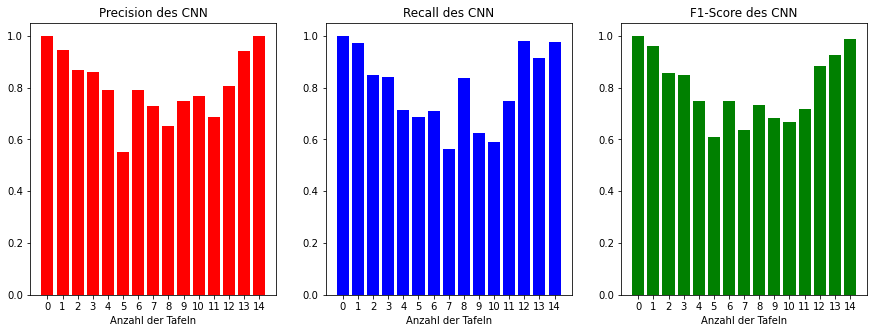

In [35]:
y_test_classes = np.argmax(y_test, axis=1)
predictions_classes = np.argmax(cnn_predictions, axis=1)

get_precision_recall_f1(predictions_classes, y_test_classes, add_string="des CNN")

### Plotten der Konfusionsmatrix

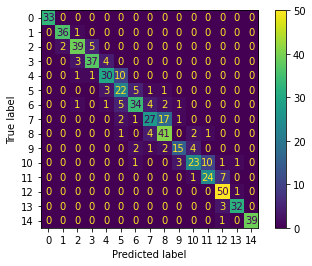

In [36]:
#result = confusion_matrix(y_test_classes, predictions_classes)
ConfusionMatrixDisplay.from_predictions(y_test_classes, predictions_classes)

### Plotten des Classification reports

In [37]:
print(classification_report(y_test_classes, predictions_classes))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.95      0.97      0.96        37
           2       0.87      0.85      0.86        46
           3       0.86      0.84      0.85        44
           4       0.79      0.71      0.75        42
           5       0.55      0.69      0.61        32
           6       0.79      0.71      0.75        48
           7       0.73      0.56      0.64        48
           8       0.65      0.84      0.73        49
           9       0.75      0.62      0.68        24
          10       0.77      0.59      0.67        39
          11       0.69      0.75      0.72        32
          12       0.81      0.98      0.88        51
          13       0.94      0.91      0.93        35
          14       1.00      0.97      0.99        40

    accuracy                           0.80       600
   macro avg       0.81      0.80      0.80       600
weighted avg       0.81   

### Zeigen einiger Beispiele von Vorhersagen

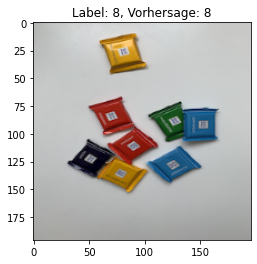

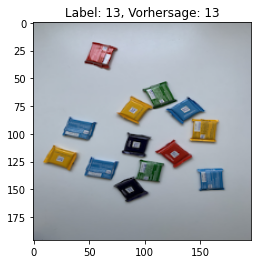

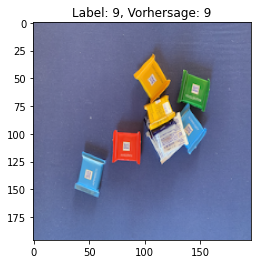

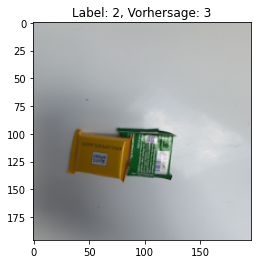

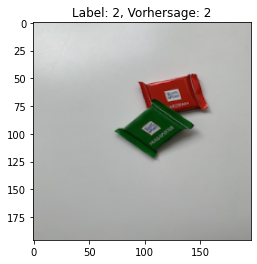

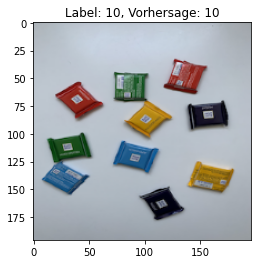

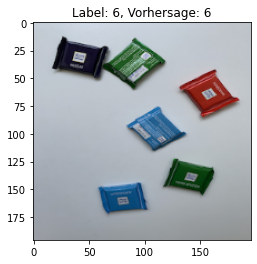

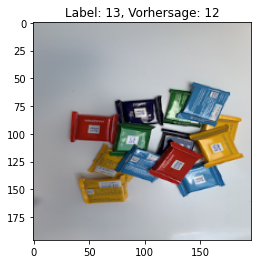

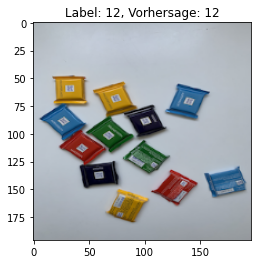

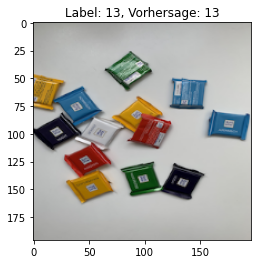

In [38]:
for count, image in enumerate(im_test):
    if count % 60 != 0:
        pass
    else:
        im = cv2.imread(image)
        im = cv2.resize(im, (196, 196))
        plt.figure()
        plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
        plt.title(f"Label: {np.argmax(y_test[count])}, Vorhersage: {np.argmax(cnn_predictions[count])}")
    

### Plotten des Fehlers auf den Trainings- und Validierungsdaten

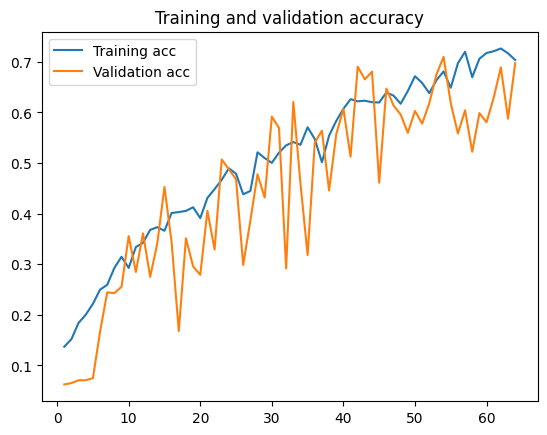

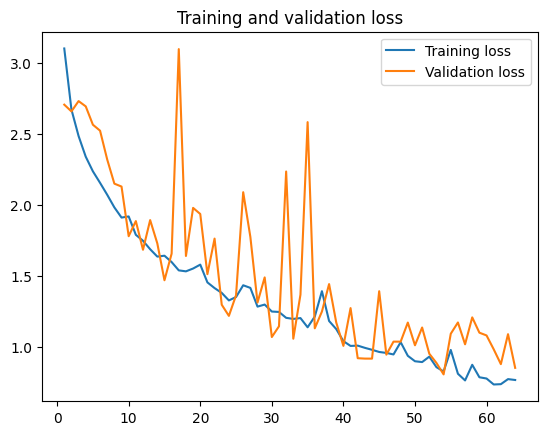

## Laden der Testdaten

In [39]:
cnn_image_path = "./Test_Bilder/*.JPG"
if platform.system() == "Windows":
    cnn_image_path = cnn_image_path.replace("/", "\\")
images_list = glob(cnn_image_path)
image_names = [os.path.basename(file) for file in glob(cnn_image_path)]
features = np.ndarray((len(images_list), 196, 196, 3))
for count, image in enumerate(images_list):
    im = cv2.imread(image)
    im = cv2.resize(im, (196, 196))
    colored_image = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    features[count,:,:] = colored_image

features = features[:,:,:]
test_features = features

cnn_label_path = "./Test_Bilder/Labels.csv"
if platform.system() == "Windows":
    cnn_label_path = cnn_label_path.replace("/", "\\")
df_labels = pd.read_csv(cnn_label_path)
df_labels = pd.get_dummies(df_labels, columns=["label"])
df_labels.insert(loc=1, column='label_0', value=[0 for i in range(df_labels.shape[0])])
df_labels.insert(loc=9, column='label_8', value=[0 for i in range(df_labels.shape[0])])
df_labels.insert(loc=11, column='label_10', value=[0 for i in range(df_labels.shape[0])])
df_labels.insert(loc=12, column='label_11', value=[0 for i in range(df_labels.shape[0])])
df_labels.insert(loc=14, column='label_13', value=[0 for i in range(df_labels.shape[0])])
df_labels.insert(loc=15, column='label_14', value=[0 for i in range(df_labels.shape[0])])

labels = np.ndarray((df_labels.shape[0], df_labels.shape[1]-1))
for im_count, image in enumerate(image_names):
    labels[im_count, :] = df_labels[df_labels["file"] == image].iloc[:, 1:].values
test_labels = labels

In [40]:
# Testen des geladenen Modells

loaded_model.evaluate(test_features, test_labels)
cnn_predictions = loaded_model.predict(test_features)

1/1 [==============================] - 0s 55ms/step


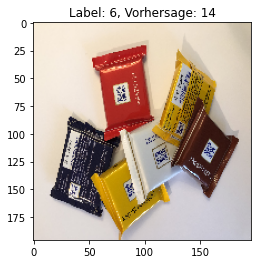

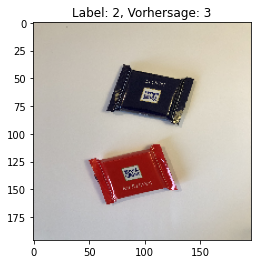

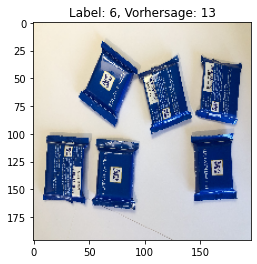

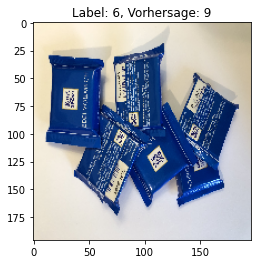

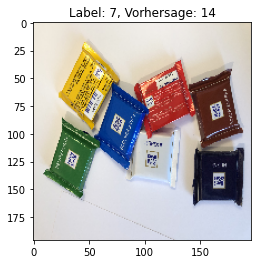

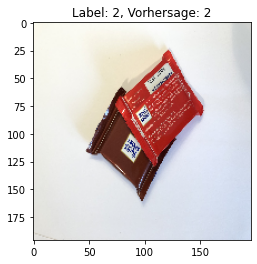

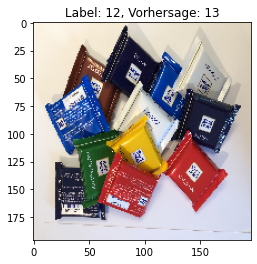

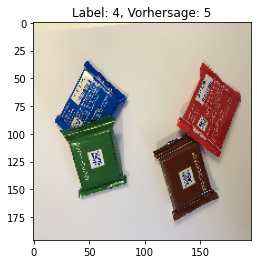

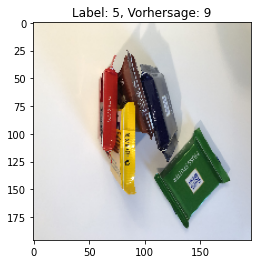

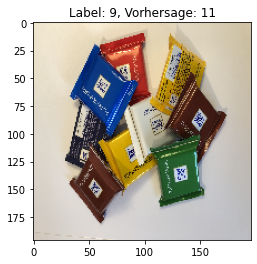

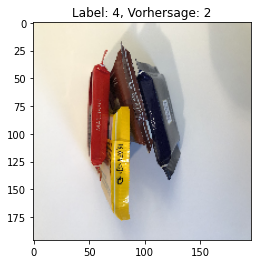

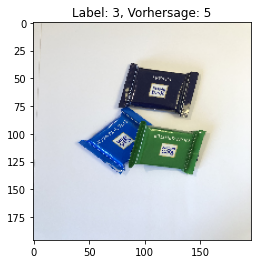

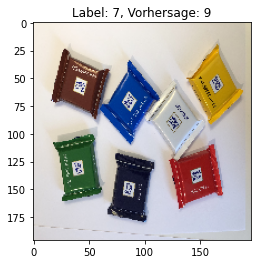

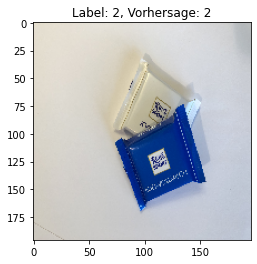

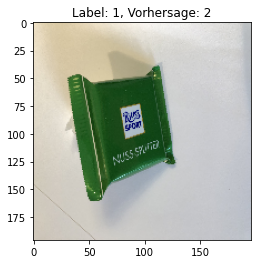

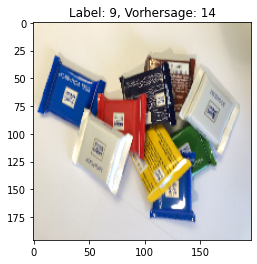

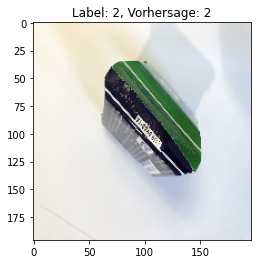

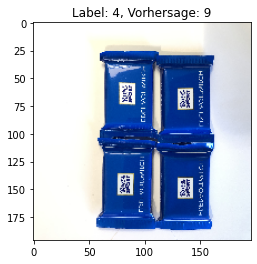

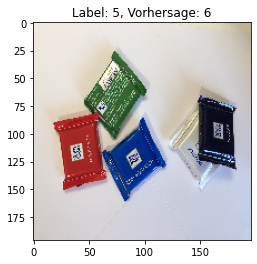

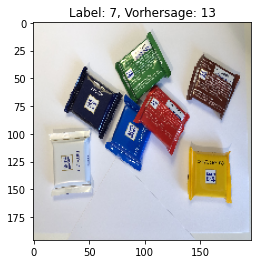

In [41]:
for count, image in enumerate(images_list):
    im = cv2.imread(image)
    im = cv2.resize(im, (196, 196))
    plt.figure()
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
    plt.title(f"Label: {np.argmax(test_labels[count])}, Vorhersage: {np.argmax(cnn_predictions[count])}")